In [1]:
import numpy as np 
from EMQST_lib import adaptive_functions as ad
from EMQST_lib.qst import QST  
from EMQST_lib import measurement_functions as mf
from EMQST_lib import visualization as vis
from EMQST_lib import support_functions as sf
from EMQST_lib.povm import POVM
%load_ext autoreload
%autoreload 2

In [45]:
n_shots = 10000
n_qubits = 1
n_averages = 10
adaptive_burnin = 1000
noise_strength = 0.2
true_states = np.array([sf.generate_random_pure_state(n_qubits) for _ in range(n_averages)])
povm = POVM.generate_Pauli_POVM(n_qubits)
qst = QST(povm, true_states,n_shots,n_qubits,False,{})
print(f'Total shots: {n_shots * n_averages}')
infidelity_container = []
labels = ['0.0', '0.05', '0.1', '0.15']
d_st = 0.01
for i in range(5):

    qst.perform_adaptive_BME(depolarizing_strength = i*d_st,
                             adaptive_burnin_steps = adaptive_burnin)
    infidelity_container.append(qst.get_infidelity())
    

Total shots: 100000
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 1/10. Final infidelity: 0.00043534962562197244.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 2/10. Final infidelity: 0.0003345844428408462.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 3/10. Final infidelity: 0.00022364231582361338.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 4/10. Final infidelity: 0.00023221873738710208.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 5/10. Final infidelity: 0.00044812033988950173.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 6/10. Final infidelity: 0.00020923966872288258.
Resampling
Resampling
Resampling
Resampling
Resampling
Resampling
Completed run 7/10. Final infidelity: 0.00014345809938165477.
Resampling
Resampling
Resampling
Resampli

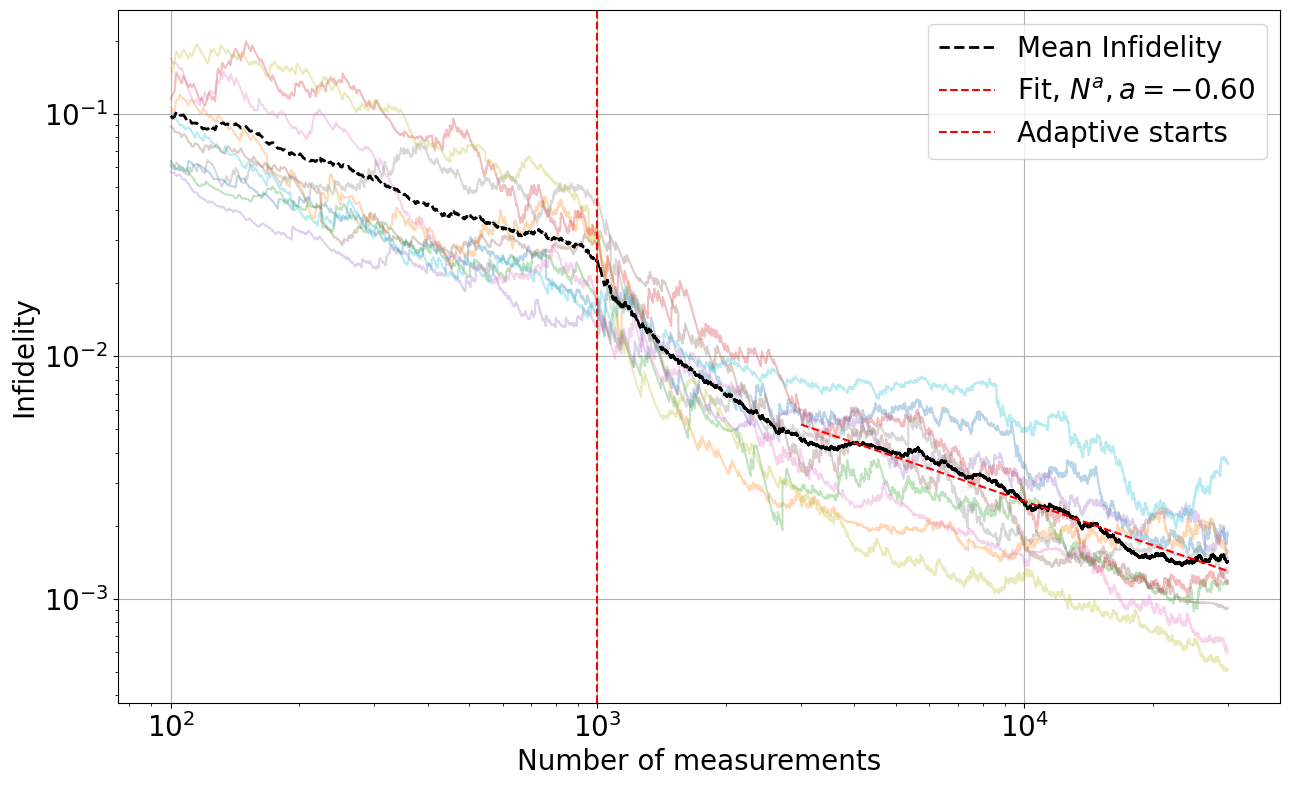

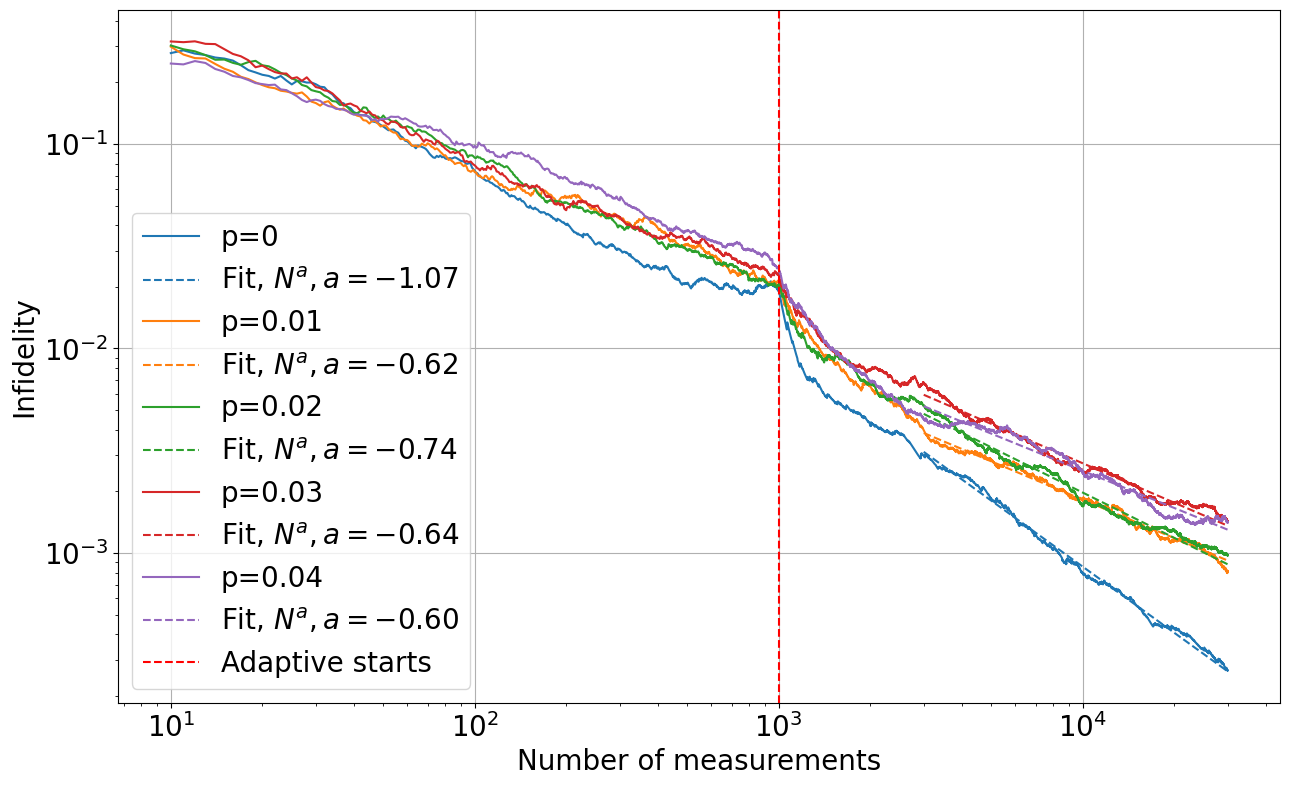

1

In [53]:

vis.plot_infidelity_curves(qst)
labels = ['p=0', 'p=0.01', 'p=0.02', 'p=0.03', 'p=0.04']
vis.plot_average_infidelity(infidelity_container, labels = labels)


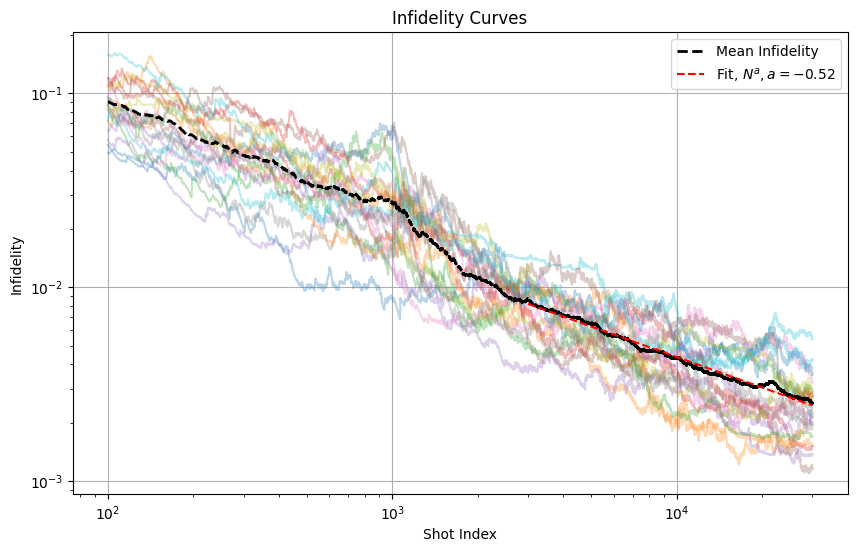

1

In [20]:
vis.plot_infidelity_curves(qst)

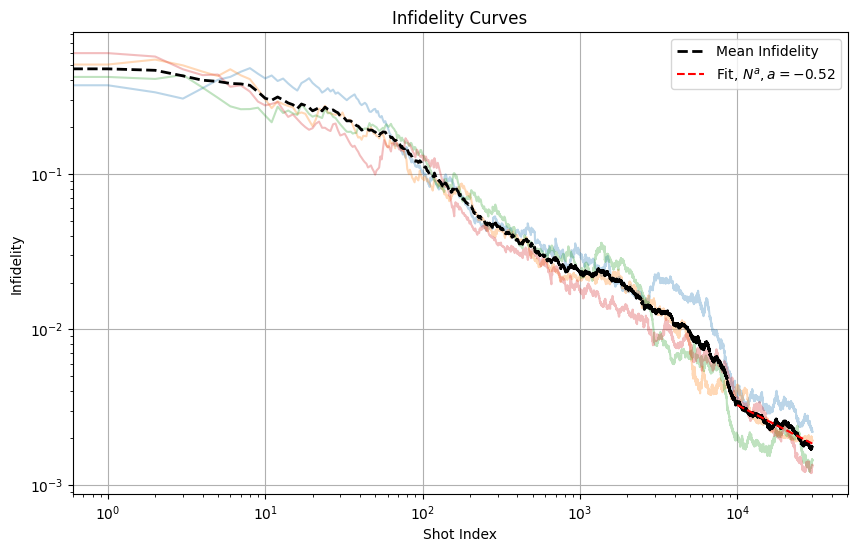

1

In [8]:
vis.plot_infidelity_curves(qst)

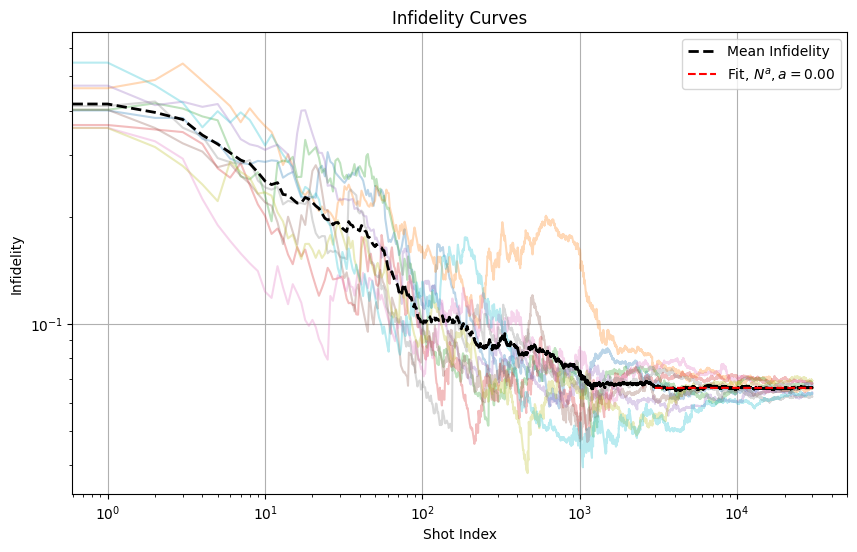

1

In [13]:
vis.plot_infidelity_curves(qst)

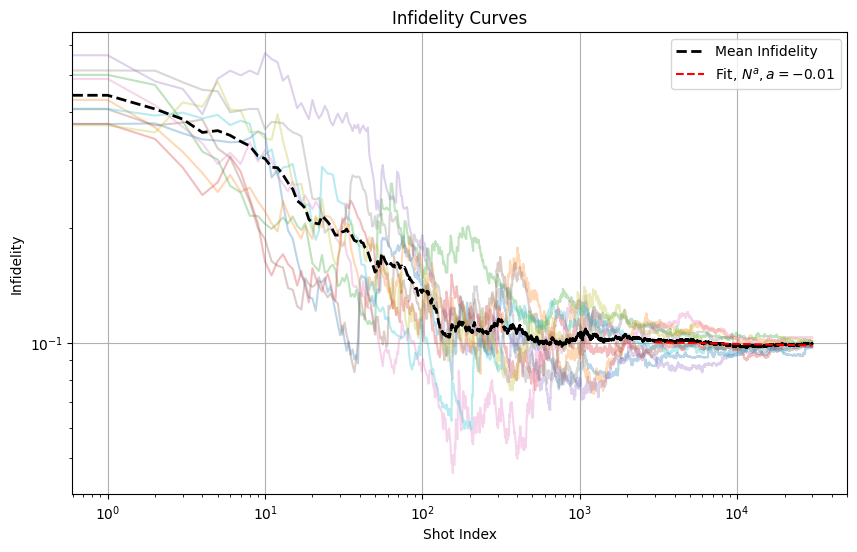

1

In [27]:
vis.plot_infidelity_curves(qst)